In [194]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.neighbors import LocalOutlierFactor

In [196]:
X, _ = make_moons(n_samples=500, noise=0.1, random_state=30)

In [198]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)
outliers = y_pred == -1
inliers = ~outliers

In [200]:
y_pred

array([ 1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

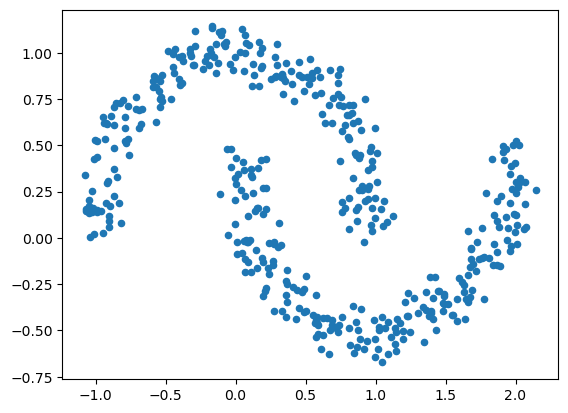

In [204]:
plt.scatter(X[inliers, 0], X[inliers, 1],s=20, label='Inliers')

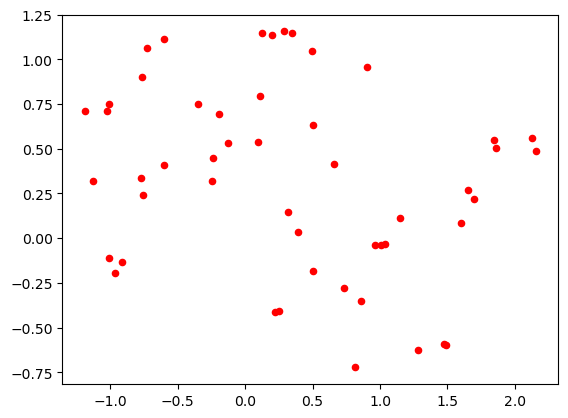

In [206]:
plt.scatter(X[outliers, 0], X[outliers, 1], c='red', s=20, label='Outliers')

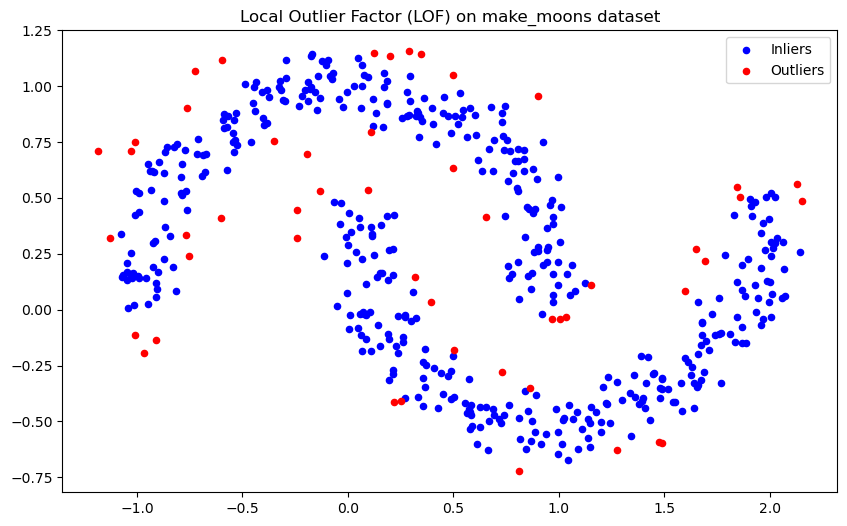

In [208]:
# Step 3: Plot the results
plt.figure(figsize=(10, 6))

# Plot inliers
plt.scatter(X[inliers, 0], X[inliers, 1], c='blue', s=20, label='Inliers')

# Plot outliers
plt.scatter(X[outliers, 0], X[outliers, 1], c='red', s=20, label='Outliers')

plt.title('Local Outlier Factor (LOF) on make_moons dataset')
plt.legend()
plt.show()

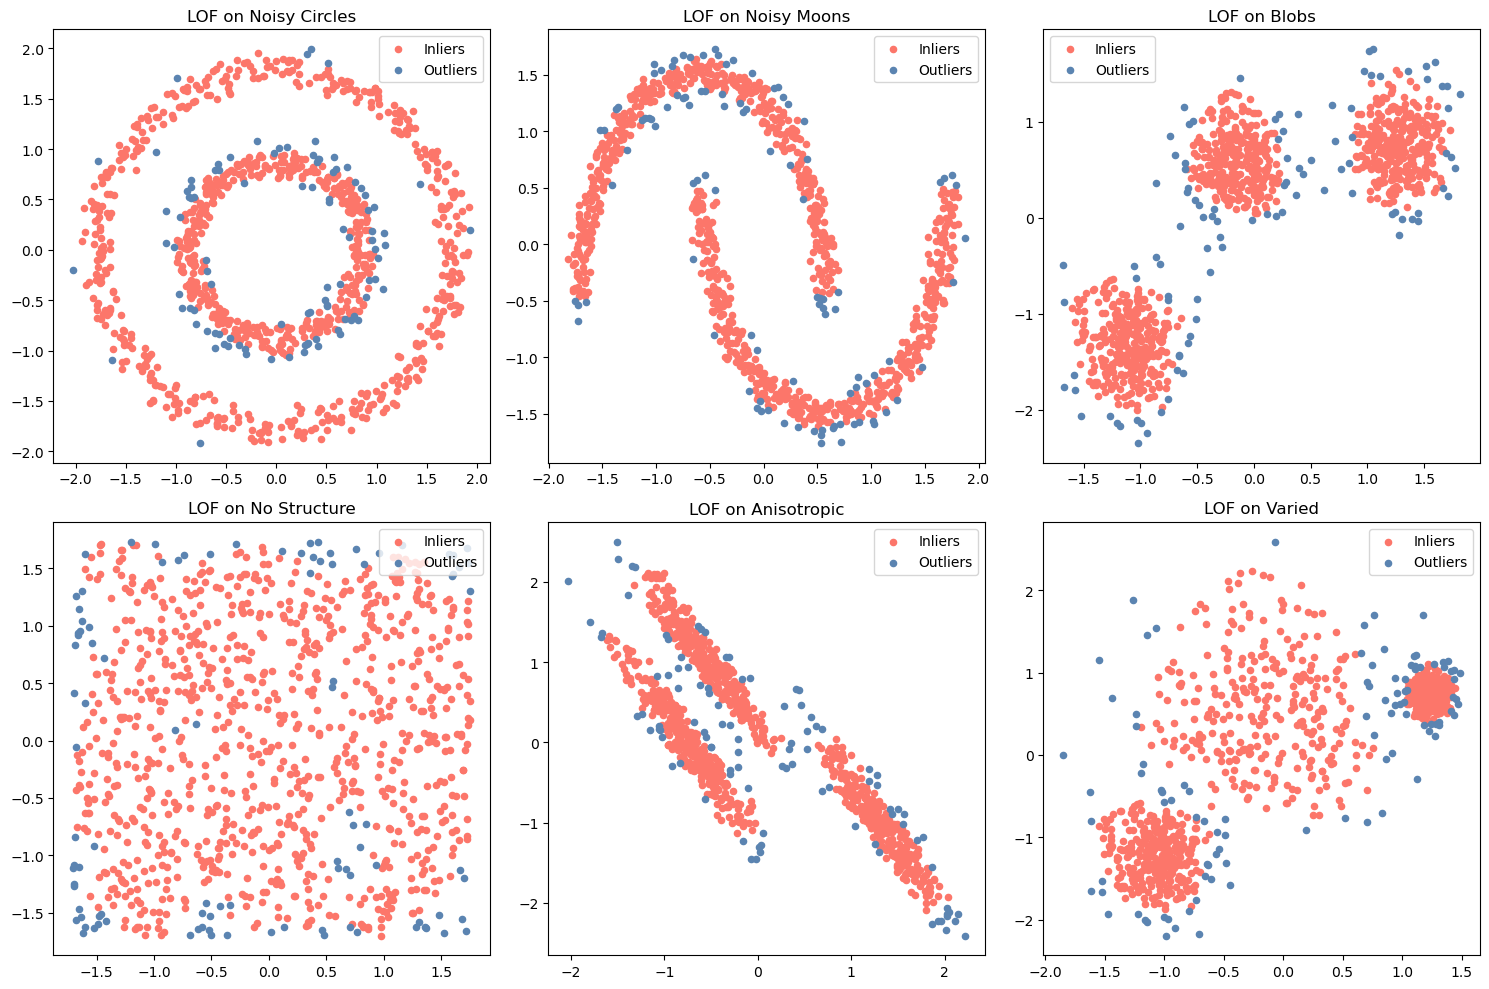

In [230]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Set up datasets
n_samples = 1000

noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=170
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=170)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=170)
rng = np.random.RandomState(170)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
X, y = datasets.make_blobs(n_samples=n_samples, random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# Blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170
)

datasets = [
    ("Noisy Circles", noisy_circles),
    ("Noisy Moons", noisy_moons),
    ("Blobs", blobs),
    ("No Structure", no_structure),
    ("Anisotropic", aniso),
    ("Varied", varied),
]

# Plot LOF results on each dataset
plt.figure(figsize=(15, 10))
for i, (dataset_name, dataset) in enumerate(datasets, start=1):
    X, _ = dataset
    X = StandardScaler().fit_transform(X)

    # Apply LOF
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
    y_pred = lof.fit_predict(X)
    outliers = y_pred == -1
    inliers = ~outliers

    # Plot results
    plt.subplot(2, 3, i)
    plt.title(f"LOF on {dataset_name}")

    plt.scatter(X[inliers, 0], X[inliers, 1], c='#FC766AFF', s=20, label='Inliers')
    plt.scatter(X[outliers, 0], X[outliers, 1], c='#5B84B1FF', s=20, label='Outliers')
    plt.legend()

plt.tight_layout()
plt.show()
